# Model Optimization- Logistic Regression

Lets first see what parameters could possibly be tuned

In [3]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
params = clf.get_params()
print("There are %d parameters for the Logistic Model.  The Default values are:" %len(params.keys()))
for key in params.keys():
    print("%25s:   %s" %(key,params[key]))

There are 8 parameters for the Logistic Model.  The Default values are:
                algorithm:   auto
                leaf_size:   30
                   metric:   minkowski
            metric_params:   None
                   n_jobs:   1
              n_neighbors:   5
                        p:   2
                  weights:   uniform


### Searchable parameters
* weights: uniform or distance
* n_neighbors (number of neighbors to use for finding k nearest)
* p: integer >=1

In [4]:
# get the data 
import ml_utils as mu

with mu.HiddenPrints():
    X, y , Xh, yh, Xv, yv = mu.get_training_holdout_validation_data()

[2018-07-11 20:49:53.008286] Starting tuning classifier__weights
# Tuning hyper-parameters for f1_micro

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished


Best parameters set found on development set:

{'classifier__weights': 'distance'}


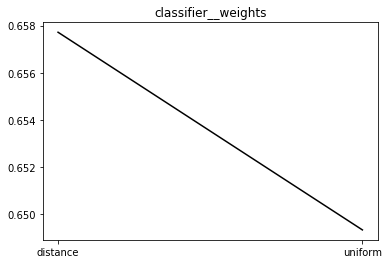

[2018-07-11 20:49:59.366133] Done with tuning classifier__weights (Took 0.100 minutes)
[2018-07-11 20:49:59.366133] Starting tuning classifier__n_neighbors
# Tuning hyper-parameters for f1_micro

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 311 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 1511 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:   33.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   33.4s finished


Best parameters set found on development set:

{'classifier__n_neighbors': 259}


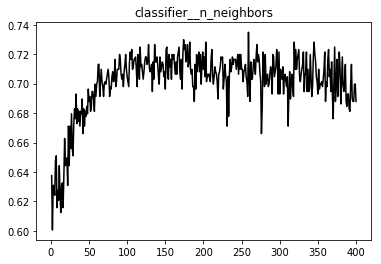

[2018-07-11 20:50:33.180431] Done with tuning classifier__n_neighbors (Took 0.550 minutes)
[2018-07-11 20:50:33.180431] Starting tuning classifier__p
# Tuning hyper-parameters for f1_micro

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters set found on development set:

{'classifier__p': 1}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.0s finished


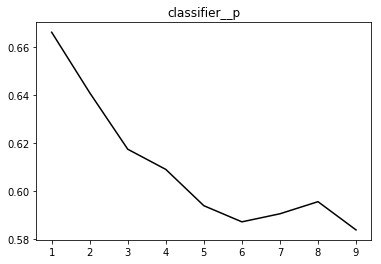

[2018-07-11 20:50:43.502486] Done with tuning classifier__p (Took 0.167 minutes)


In [26]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

# parameters and ranges to plot
param_grid = {
    "classifier__weights": ['uniform', 'distance'],
    "classifier__n_neighbors": range(1, 401),
    "classifier__p": range(1,10),
}

clf = Pipeline([
    ('standardization', StandardScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', KNeighborsClassifier())
])

for parameter, param_range in dict.items(param_grid):
    with mu.Timer("tuning %s" %parameter) as timer:
        mu.unidirectional_grid_search_optimization(clf, parameter, param_range, X, y)